<a href="https://colab.research.google.com/github/kenextra/IBM-MLCert/blob/main/Exploratory_Data_Analysis_for_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis for Machine Learning

## Sections required in your report:

1. Brief description of the data set and a summary of its attributes

2. Initial plan for data exploration.

3. Actions taken for data cleaning and feature engineering.

4. Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner.

5. Formulating at least 3 hypothesis about this data.

6. Conducting a formal significance test for one of the hypotheses and discuss the results.

7. Suggestions for next steps in analyzing this data.

8. A paragraph that summarizes the quality of this data set and a request for additional data if needed.

# General Section

In [2]:
# install and reset runtime
%%bash
pip install --upgrade pandas --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.2 which is incompatible.


## Import needed libraries

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
# from collections import OrderedDict
from matplotlib.gridspec import GridSpec
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
pd.__version__

'1.3.2'

In [3]:
import urllib.request
from zipfile import ZipFile

# Download Data

In [4]:
DATA_URL = "https://www.mathworks.com/supportfiles/practicaldsmatlab/taxi/Taxi%20Data.zip"
DATA_NAME = "TaxiData.zip"
urllib.request.urlretrieve(DATA_URL, DATA_NAME)

('TaxiData.zip', <http.client.HTTPMessage at 0x7f1787bf00d0>)

In [5]:
# Create a ZipFile Object and load data in it
with ZipFile(DATA_NAME, 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

# Import and Explore Data

In [6]:
use_cols = ['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'RateCodeID',
 'store_and_fwd_flag',
 'dropoff_longitude',
 'dropoff_latitude',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount']

parse_dates = ["tpep_pickup_datetime", "tpep_dropoff_datetime"]

In [7]:
from pathlib import Path
DATA_DIR = Path.cwd() / 'Taxi Data'
DATA_DIR

PosixPath('/content/Taxi Data')

In [8]:
dtype = {'RateCodeID': str, 'payment_type': str, 'VendorID': str, 'RatecodeID': str,}  # , dtype=dtype

In [9]:
df_from_each_file = (pd.read_csv(f, parse_dates=parse_dates, dtype=dtype, names=use_cols, low_memory=False, skiprows=1)
                    for f in DATA_DIR.iterdir() if 'yellow' in str(f))
df = pd.concat(df_from_each_file, axis=0, ignore_index=True,)

In [10]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922266 entries, 0 to 2922265
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               2922266 non-null  object        
 1   tpep_pickup_datetime   2922266 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  2922266 non-null  datetime64[ns]
 3   passenger_count        2922266 non-null  int64         
 4   trip_distance          2922266 non-null  float64       
 5   pickup_longitude       2922266 non-null  float64       
 6   pickup_latitude        2922266 non-null  float64       
 7   RateCodeID             2922266 non-null  object        
 8   store_and_fwd_flag     2922266 non-null  object        
 9   dropoff_longitude      2922266 non-null  float64       
 10  dropoff_latitude       2922266 non-null  float64       
 11  payment_type           2922266 non-null  object        
 12  fare_amount            29222

In [11]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-10-01 00:00:02,2015-10-01 00:17:37,2,5.68,-73.997597,40.756248,1,N,-73.941002,40.815140,2,18.5,0.5,0.5,0.00,0.0,0.3,19.80
1,2,2015-10-01 00:00:23,2015-10-01 00:13:12,5,7.13,-74.016586,40.709816,1,N,-73.959991,40.766918,2,20.5,0.5,0.5,0.00,0.0,0.3,21.80
2,2,2015-10-01 00:00:35,2015-10-01 00:12:17,2,1.72,-74.008247,40.714821,1,N,-73.984581,40.720299,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,2,2015-10-01 00:00:36,2015-10-01 00:09:45,1,1.06,-73.992363,40.737640,1,N,-73.993813,40.745838,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56
4,2,2015-10-14 10:23:37,2015-10-14 10:34:56,6,1.07,-74.001839,40.715561,1,N,-73.989189,40.714081,1,8.5,0.0,0.5,1.00,0.0,0.3,10.30


In [12]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
2922261,2,2015-05-02 12:21:18,2015-05-02 12:39:20,1,2.34,-73.974800,40.759369,1,N,-73.981812,40.762482,2,10.5,0.0,0.5,0.00,0.0,0.3,11.30
2922262,2,2015-05-10 23:48:29,2015-05-11 00:00:23,2,1.65,-73.991837,40.716179,1,N,-73.998413,40.717201,1,8.0,0.5,0.5,0.75,0.0,0.3,10.05
2922263,2,2015-05-02 10:24:23,2015-05-02 10:33:28,2,1.78,-73.999840,40.721970,1,N,-74.004539,40.740681,1,8.5,0.0,0.5,1.86,0.0,0.3,11.16
2922264,2,2015-05-08 15:02:24,2015-05-08 15:13:45,2,1.30,-74.007523,40.743206,1,N,-73.989426,40.742603,2,8.5,0.0,0.5,0.00,0.0,0.3,9.30
2922265,2,2015-05-21 19:53:11,2015-05-21 20:05:18,1,2.23,-73.986984,40.770714,1,N,-73.967560,40.792850,1,10.5,1.0,0.5,2.20,0.0,0.3,14.50


In [13]:
df['store_and_fwd_flag'].value_counts()

N    2897970
Y      24296
Name: store_and_fwd_flag, dtype: int64

In [14]:
df.describe().loc[['min', 'max']]

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
min,0.0,0.0,-171.797348,0.000000,-171.797348,0.000000,-150.00,-45.20,-1.70,-2.7,-15.00,-0.3,-150.80
max,9.0,14680110.0,0.000000,69.702576,0.000000,456.366669,410266.86,579.72,80.35,650.0,911.08,0.3,410267.66


In [15]:
df.describe(include=['object'])

,VendorID,RateCodeID,store_and_fwd_flag,payment_type
count,2922266,2922266,2922266,2922266
unique,2,7,2,5
top,2,1,N,1
freq,1534687,2845340,2897970,1832292


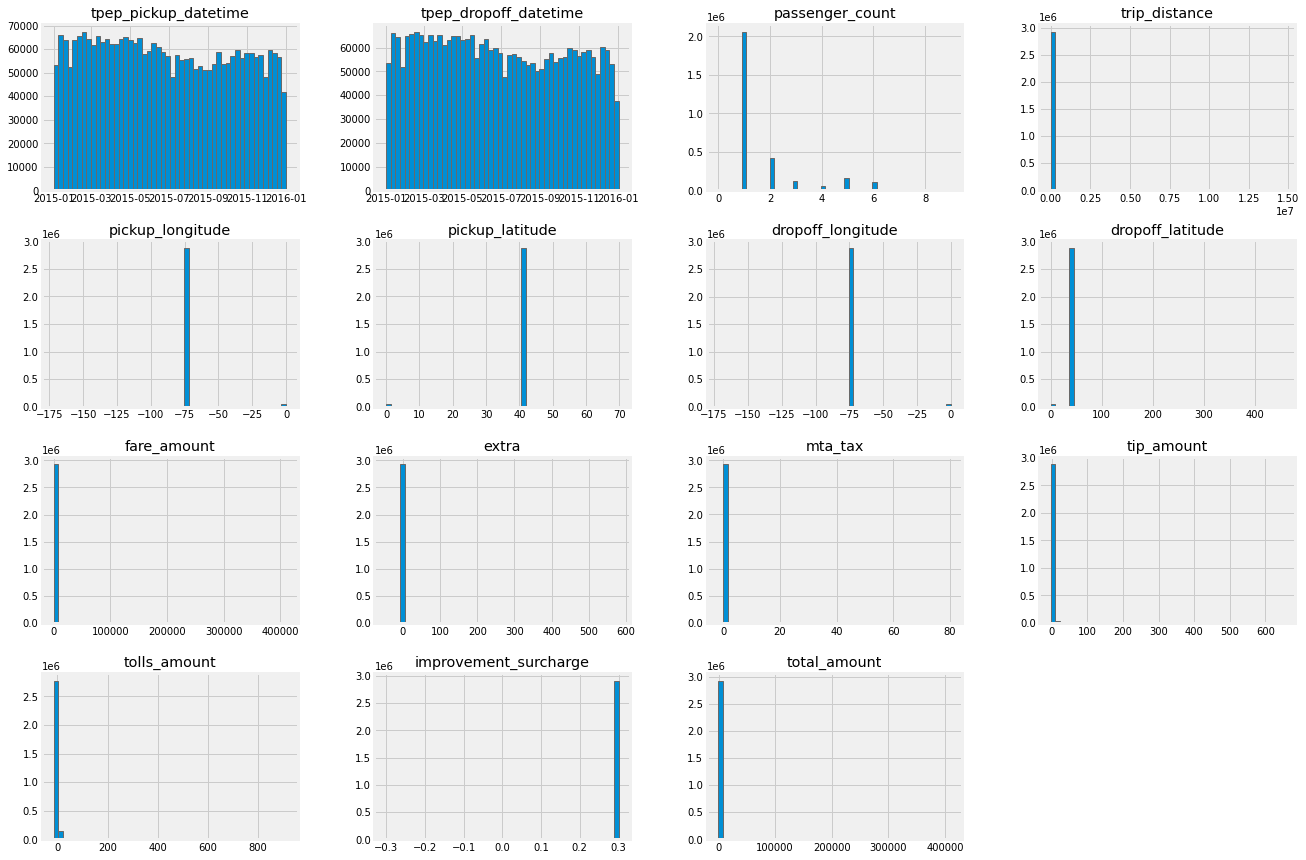

In [16]:
_ = df.hist(bins=50, figsize=(20, 15))

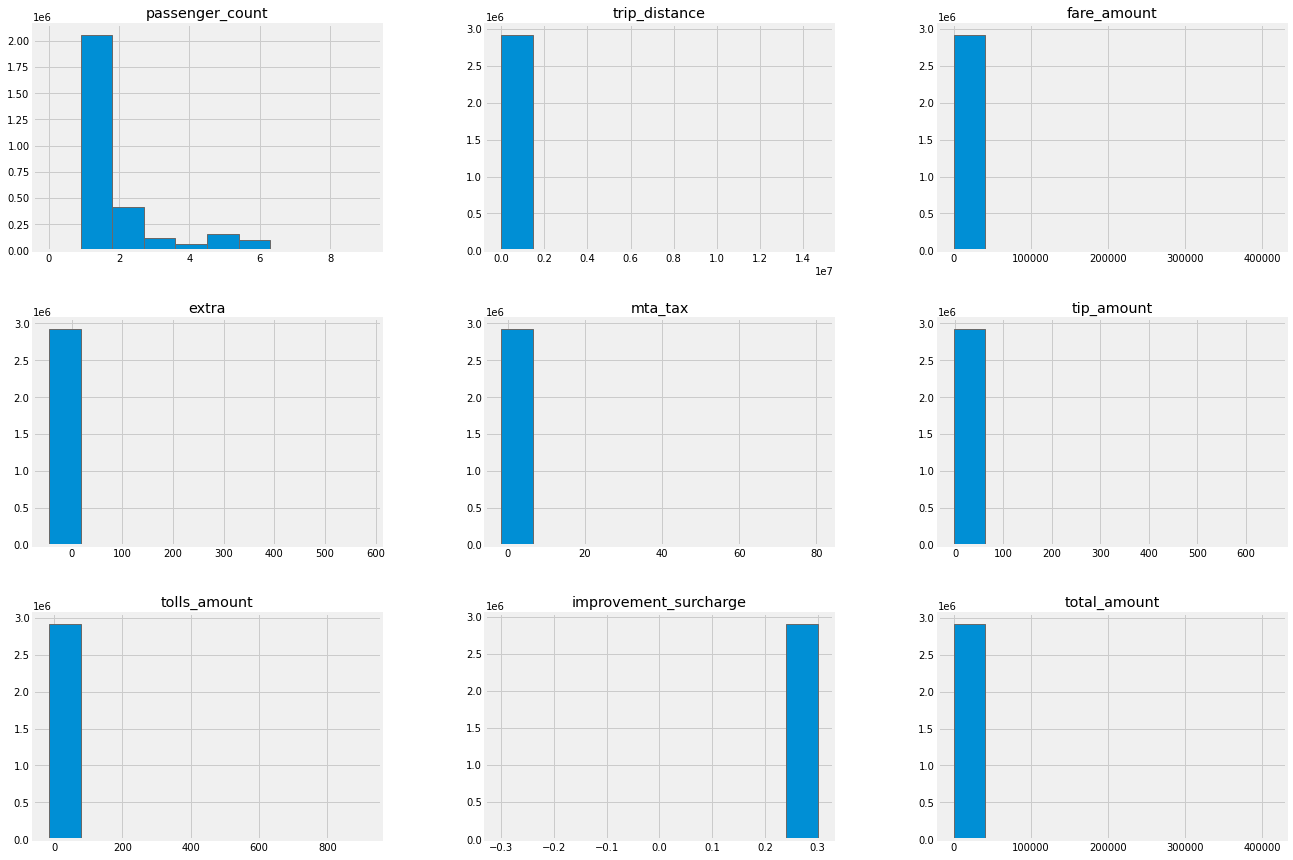

In [17]:
_ = df[['passenger_count',
        'trip_distance',
        'payment_type',
        'fare_amount',
        'extra',
        'mta_tax',
        'tip_amount',
        'tolls_amount',
        'improvement_surcharge',
        'total_amount',
        ]].hist(figsize=(20, 15))

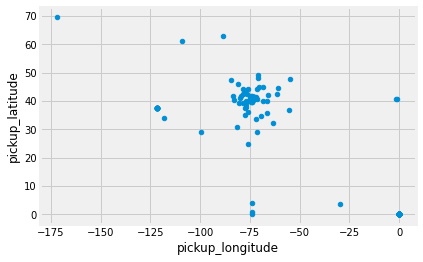

In [18]:
# Visualizing Geographical Data
_ = df.plot(kind="scatter", x='pickup_longitude', y='pickup_latitude',)

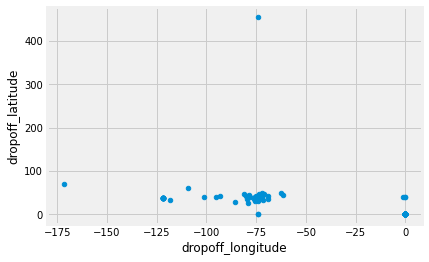

In [19]:
_ = df.plot(kind="scatter", x='dropoff_longitude', y='dropoff_latitude',)

In [20]:
Payment_Type = {"1": "Credit card",
"2": "Cash",
"3": "No charge",
"4": "Dispute",
"5": "Unknown",
"6":"Voided trip",}
df['payment_type'] = df['payment_type'].apply(lambda x: Payment_Type[x])
df['payment_type'].value_counts()

Credit card    1832292
Cash           1076428
No charge        10130
Dispute           3413
Unknown              3
Name: payment_type, dtype: int64

In [21]:
RateCode = {"1": "Standard rate",
"2":"JFK",
"3": "Newark",
"4": "Nassau or Westchester",
"5": "Negotiated fare",
"6": "Group ride",
"99" : "99"}
df['RateCodeID'] = df['RateCodeID'].apply(lambda x: RateCode[x])
df['RateCodeID'].value_counts()

Standard rate            2845340
JFK                        61564
Negotiated fare             9110
Newark                      5046
Nassau or Westchester       1051
99                           127
Group ride                    28
Name: RateCodeID, dtype: int64

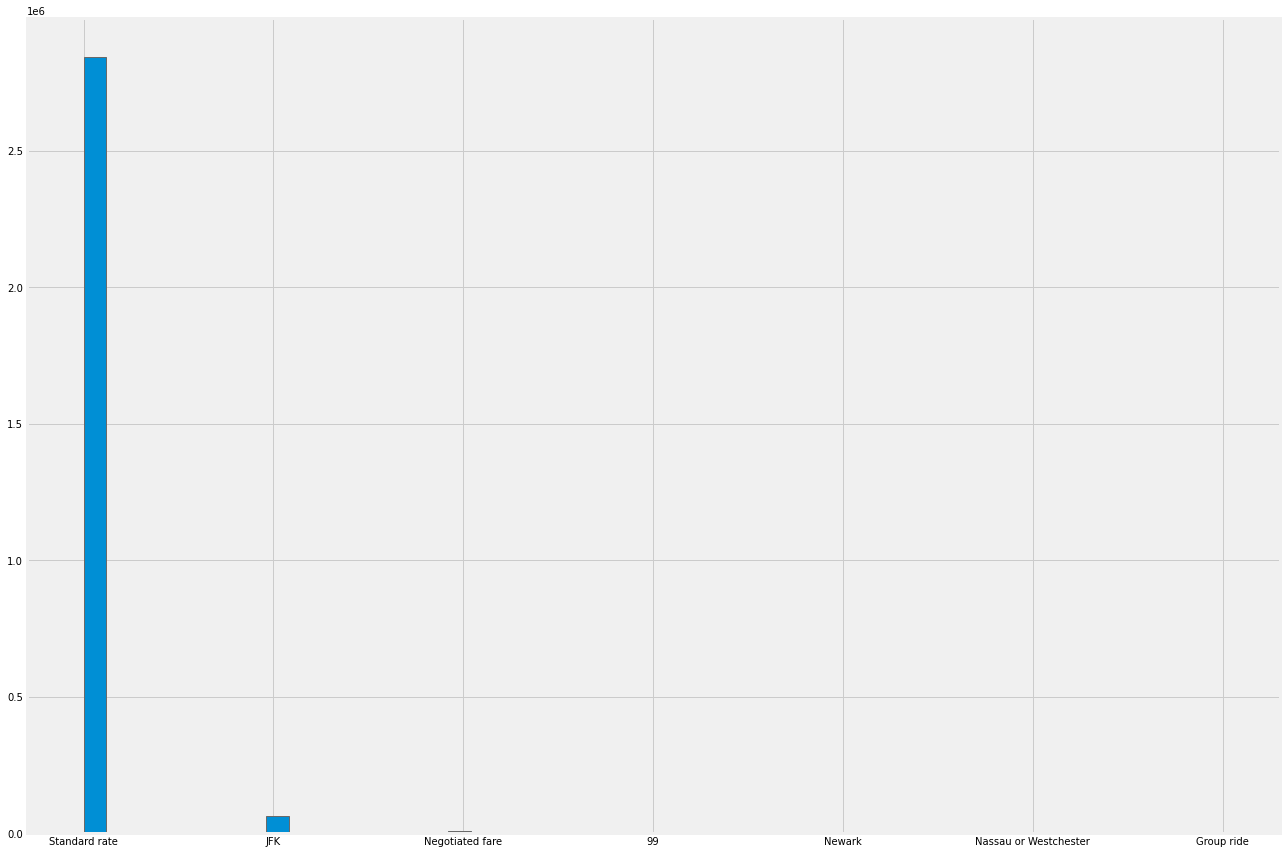

In [22]:
_ = df['RateCodeID'].hist(bins=50, figsize=(20, 15))

# Data Cleaning and Feature engineering 

### Remove invalid charges
Only keep trips (rows) containing valid charges.

In [24]:
df.query('RateCodeID != "99"').shape

(2922139, 19)

In [26]:
# df[df['RateCodeID'] != "99"]

In [27]:
df = df.query('RateCodeID != "99"')
df['RateCodeID'].value_counts()

Standard rate            2845340
JFK                        61564
Negotiated fare             9110
Newark                      5046
Nassau or Westchester       1051
Group ride                    28
Name: RateCodeID, dtype: int64

In [28]:
df = df.query('fare_amount > 0')
df = df.query('extra >= 0')
df = df.query('mta_tax >= 0')
df = df.query('tip_amount >= 0')
df = df.query('tolls_amount >= 0')
df = df.query('improvement_surcharge >= 0')
df = df.query('total_amount > 0')

In [29]:
df.shape

(2920221, 19)

### Remove invalid trip information
Only keep trips with valid passenger and distance information.

In [30]:
df = df.query('passenger_count > 0')
df = df.query('trip_distance > 0')

### Remove outliers
Only keep trips with pickup and drop off locations inside the region of interest.

In [31]:
# Bounding latitude/longitude
lat = [40.5612, 40.9637]
lon = [-74.1923, -73.5982]

In [32]:
df.shape

(2901668, 19)

In [33]:
df = df.query(f'pickup_longitude >= {lon[0]} & pickup_longitude <= {lon[1]}')
df = df.query(f'dropoff_longitude >= {lon[0]} & dropoff_longitude <= {lon[1]}')
df = df.query(f'pickup_latitude >= {lat[0]} & pickup_latitude <= {lat[1]}')
df = df.query(f'dropoff_latitude >= {lat[0]} & dropoff_latitude <= {lat[1]}')
df.shape

(2856490, 19)

### Only keep trips with typical values

In [34]:
df = df.query('trip_distance > 0.01 & trip_distance <= 50')
df = df.query('fare_amount > 0.01 & fare_amount <= 100')
df = df.query('tolls_amount <= 20')
df = df.query('total_amount >= 0.5 & total_amount <= 120')
df.shape

(2854781, 19)

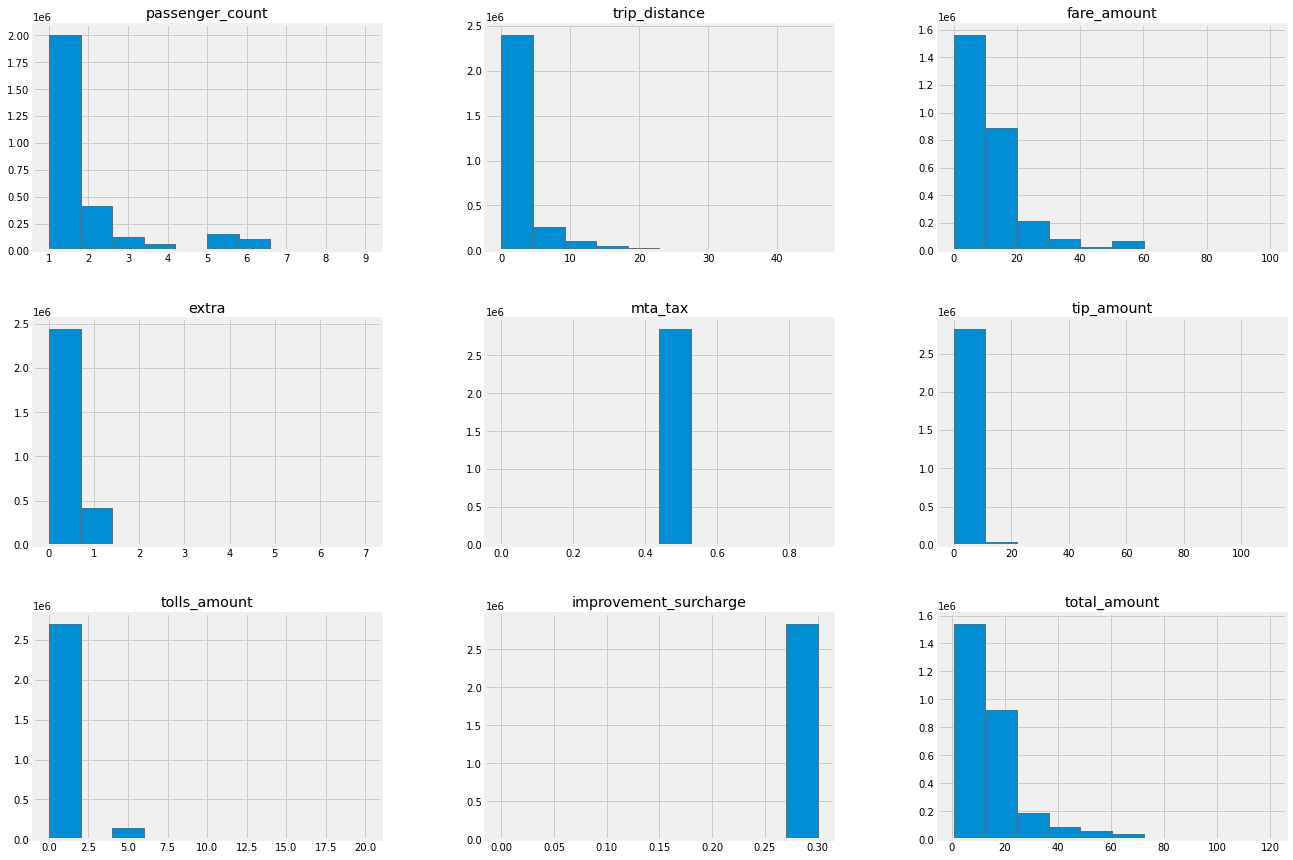

In [35]:
_ = df[['passenger_count',
        'trip_distance',
        'payment_type',
        'fare_amount',
        'extra',
        'mta_tax',
        'tip_amount',
        'tolls_amount',
        'improvement_surcharge',
        'total_amount',
        ]].hist(figsize=(20, 15))

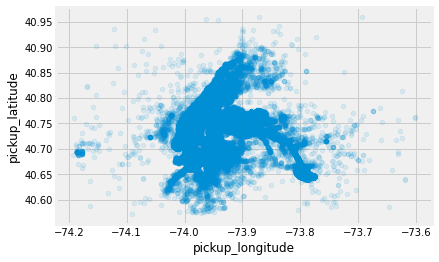

In [36]:
# Visualizing Geographical Data
_ = df.plot(kind="scatter", x='pickup_longitude', y='pickup_latitude', alpha=0.1,)

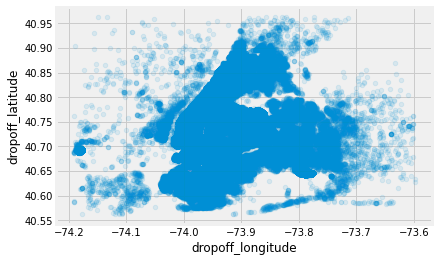

In [37]:
_ = df.plot(kind="scatter", x='dropoff_longitude', y='dropoff_latitude', alpha=0.1,)

### Add trip features
Add two new variables to the table

1. ***Duration*** - Length of the trip, in minutes 
calculated from the pickup and drop off times.

2. ***AveSpeed*** - Average speed, in mph, calculated from the distance and duration values.

In [38]:
df['duration'] = pd.to_timedelta((df.tpep_dropoff_datetime - df.tpep_pickup_datetime), unit='minutes').dt.seconds / 60
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,2,2015-10-01 00:00:02,2015-10-01 00:17:37,2,5.68,-73.997597,40.756248,Standard rate,N,-73.941002,40.815140,Cash,18.5,0.5,0.5,0.00,0.0,0.3,19.80,17.583333
1,2,2015-10-01 00:00:23,2015-10-01 00:13:12,5,7.13,-74.016586,40.709816,Standard rate,N,-73.959991,40.766918,Cash,20.5,0.5,0.5,0.00,0.0,0.3,21.80,12.816667
2,2,2015-10-01 00:00:35,2015-10-01 00:12:17,2,1.72,-74.008247,40.714821,Standard rate,N,-73.984581,40.720299,Cash,9.5,0.5,0.5,0.00,0.0,0.3,10.80,11.700000
3,2,2015-10-01 00:00:36,2015-10-01 00:09:45,1,1.06,-73.992363,40.737640,Standard rate,N,-73.993813,40.745838,Credit card,7.5,0.5,0.5,1.76,0.0,0.3,10.56,9.150000
4,2,2015-10-14 10:23:37,2015-10-14 10:34:56,6,1.07,-74.001839,40.715561,Standard rate,N,-73.989189,40.714081,Credit card,8.5,0.0,0.5,1.00,0.0,0.3,10.30,11.316667


In [39]:
df['ave_speed'] = (60*df.trip_distance) / df['duration']
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,ave_speed
0,2,2015-10-01 00:00:02,2015-10-01 00:17:37,2,5.68,-73.997597,40.756248,Standard rate,N,-73.941002,40.815140,Cash,18.5,0.5,0.5,0.00,0.0,0.3,19.80,17.583333,19.381991
1,2,2015-10-01 00:00:23,2015-10-01 00:13:12,5,7.13,-74.016586,40.709816,Standard rate,N,-73.959991,40.766918,Cash,20.5,0.5,0.5,0.00,0.0,0.3,21.80,12.816667,33.378414
2,2,2015-10-01 00:00:35,2015-10-01 00:12:17,2,1.72,-74.008247,40.714821,Standard rate,N,-73.984581,40.720299,Cash,9.5,0.5,0.5,0.00,0.0,0.3,10.80,11.700000,8.820513
3,2,2015-10-01 00:00:36,2015-10-01 00:09:45,1,1.06,-73.992363,40.737640,Standard rate,N,-73.993813,40.745838,Credit card,7.5,0.5,0.5,1.76,0.0,0.3,10.56,9.150000,6.950820
4,2,2015-10-14 10:23:37,2015-10-14 10:34:56,6,1.07,-74.001839,40.715561,Standard rate,N,-73.989189,40.714081,Credit card,8.5,0.0,0.5,1.00,0.0,0.3,10.30,11.316667,5.673049


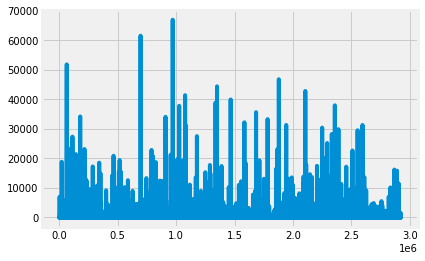

In [40]:
_ = df['ave_speed'].plot()

In [41]:
df.describe()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,ave_speed
count,2.854781e+06,2.854781e+06,2.854781e+06,2.854781e+06,2.854781e+06,2.854781e+06,2.854781e+06,2.854781e+06,2.854781e+06,2.854781e+06,2.854781e+06,2.854781e+06,2.854781e+06,2.854781e+06,2.854781e+06
mean,1.687489e+00,2.977091e+00,-7.397393e+01,4.075073e+01,-7.397365e+01,4.075144e+01,1.279740e+01,3.152972e-01,4.988225e-01,1.687174e+00,2.988464e-01,2.985366e-01,1.589759e+01,1.539862e+01,inf
std,1.339665e+00,3.549219e+00,3.749545e-02,2.769907e-02,3.482345e-02,3.161336e-02,1.013674e+01,3.616950e-01,2.423842e-02,2.315180e+00,1.333312e+00,2.090192e-02,1.247670e+01,4.460717e+01,NaN
min,1.000000e+00,2.000000e-02,-7.419228e+01,4.057098e+01,-7.419228e+01,4.056189e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e-01,0.000000e+00,1.217883e-03
25%,1.000000e+00,1.020000e+00,-7.399205e+01,4.073705e+01,-7.399141e+01,4.073560e+01,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00,6.716667e+00,7.754941e+00
50%,1.000000e+00,1.740000e+00,-7.398196e+01,4.075362e+01,-7.398008e+01,4.075409e+01,9.500000e+00,0.000000e+00,5.000000e-01,1.160000e+00,0.000000e+00,3.000000e-01,1.180000e+01,1.113333e+01,1.059494e+01
75%,2.000000e+00,3.200000e+00,-7.396777e+01,4.076800e+01,-7.396354e+01,4.076907e+01,1.450000e+01,5.000000e-01,5.000000e-01,2.300000e+00,0.000000e+00,3.000000e-01,1.780000e+01,1.800000e+01,1.443017e+01
max,9.000000e+00,4.590000e+01,-7.360198e+01,4.096010e+01,-7.359824e+01,4.096333e+01,1.000000e+02,7.000000e+00,8.800000e-01,1.100000e+02,2.000000e+01,3.000000e-01,1.200000e+02,1.439917e+03,inf


In [42]:
df.describe(include=['object'])

,VendorID,RateCodeID,store_and_fwd_flag,payment_type
count,2854781,2854781,2854781,2854781
unique,2,6,2,4
top,2,Standard rate,N,Credit card
freq,1513016,2788367,2832032,1796247


### Looking for Correlations

In [43]:
corr_matrix = df.corr()

In [44]:
corr_matrix

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,ave_speed
passenger_count,1.000000,0.015467,0.004715,-0.005996,0.000624,-0.002831,0.014860,0.002380,0.002401,-0.006161,0.012413,0.012234,0.012331,0.014855,-0.004390
trip_distance,0.015467,1.000000,0.541829,-0.315207,0.382405,-0.198756,0.953059,-0.058440,-0.140061,0.551376,0.631286,-0.000654,0.942129,0.194858,0.051791
pickup_longitude,0.004715,0.541829,1.000000,-0.139947,0.255894,0.039785,0.486819,-0.068339,0.007245,0.257977,0.391743,-0.001183,0.483289,0.090570,0.032212
pickup_latitude,-0.005996,-0.315207,-0.139947,1.000000,0.054007,0.414303,-0.286221,-0.004465,0.007147,-0.145694,-0.103045,0.001673,-0.270703,-0.058682,-0.019719
dropoff_longitude,0.000624,0.382405,0.255894,0.054007,1.000000,0.115505,0.329507,-0.011432,0.184569,0.164377,0.184807,-0.001639,0.317986,0.059408,0.032399
dropoff_latitude,-0.002831,-0.198756,0.039785,0.414303,0.115505,1.000000,-0.204493,-0.003264,0.054523,-0.137939,-0.074718,0.001182,-0.199711,-0.044880,-0.014015
fare_amount,0.014860,0.953059,0.486819,-0.286221,0.329507,-0.204493,1.000000,-0.067806,-0.225807,0.571171,0.623594,0.005124,0.982680,0.218339,0.023487
extra,0.002380,-0.058440,-0.068339,-0.004465,-0.011432,-0.003264,-0.067806,1.000000,0.025056,-0.014204,-0.075137,0.010117,-0.036715,-0.013145,-0.002324
mta_tax,0.002401,-0.140061,0.007245,0.007147,0.184569,0.054523,-0.225807,0.025056,1.000000,-0.136900,-0.333466,0.001809,-0.241827,-0.018747,-0.024791
tip_amount,-0.006161,0.551376,0.257977,-0.145694,0.164377,-0.137939,0.571171,-0.014204,-0.136900,1.000000,0.440519,0.010262,0.696002,0.113279,0.015245


In [45]:
corr_matrix['total_amount'].sort_values(ascending=False)

total_amount             1.000000
fare_amount              0.982680
trip_distance            0.942129
tip_amount               0.696002
tolls_amount             0.692427
pickup_longitude         0.483289
dropoff_longitude        0.317986
duration                 0.209968
ave_speed                0.023662
passenger_count          0.012331
improvement_surcharge    0.006751
extra                   -0.036715
dropoff_latitude        -0.199711
mta_tax                 -0.241827
pickup_latitude         -0.270703
Name: total_amount, dtype: float64

In [46]:
from pandas.plotting import scatter_matrix

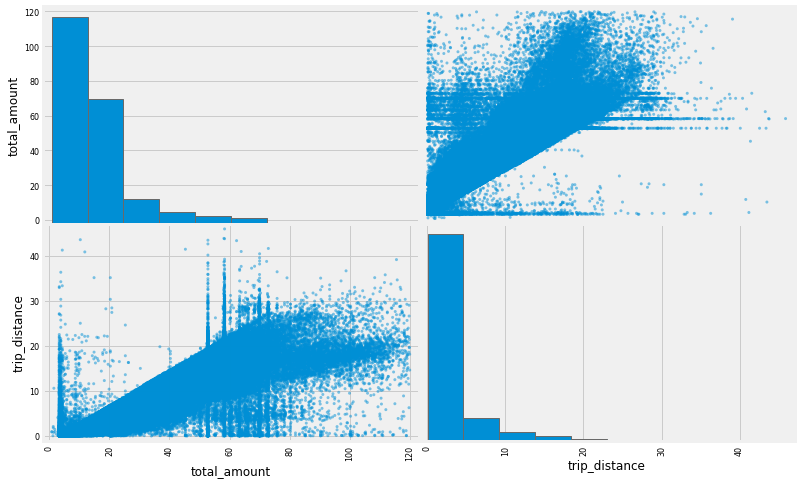

In [47]:
attributes = ['total_amount', 'trip_distance',
              ]

_ = scatter_matrix(df[attributes], figsize=(12, 8))